
### Let's Finish Basic Pandas: Data Loading + Pandas Plotting

- Recall loading our carbon emissions data
- Explore some inconsistencies
- Some plotting and agreggation functions
- Other plotting
- On to **geo**pandas!

In [2]:
#Import our basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Our Carbon Emissions Dataset

Download locally, and write a function 

In [3]:
from urllib import request

#URL for file
url_name = r'https://zenodo.org/record/4281271/files/nation.1751_2017.csv?download=1'

#Local file name to save to
local_file = r'Data/nation.1751_2017.csv'

#Download and save
#equest.urlretrieve(url_name, local_file)

In [4]:
#Let's define a function to load:

def get_carbon_df():
    local_file = r'Data/nation.1751_2017.csv'
    
    #We'll rename our colume
    name_list = ['Nation', 'Year', 'Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Per_Capita', 'Bunker']
    
    #Skip 4 lines of preamble stuff
    #Also have '. ' as NA
    new_df = pd.read_csv(local_file, header = 4, names = name_list, na_values = '. ')
    
    #Throw in stripping the whitespace from the names too:
    new_df.Nation = new_df.Nation.str.strip()
    
    return new_df

In [5]:
#Take a quick look at the data
df = get_carbon_df()
df.head()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,1949,4,4.0,0.0,0.0,0,NaN,NaN,0
1,AFGHANISTAN,1950,23,6.0,18.0,0.0,0,0.0,0.0,0
2,AFGHANISTAN,1951,25,7.0,18.0,0.0,0,0.0,0.0,0
3,AFGHANISTAN,1952,25,9.0,17.0,0.0,0,0.0,0.0,0
4,AFGHANISTAN,1953,29,10.0,18.0,0.0,0,0.0,0.0,0


### Recall Using GroupBy with Pandas

1. *Split* DataFrame into groups based on one or more *keys*, along a particular axis (rows, `axis = 0`; or colums, `axis = 1`)
2. Apply a function to each group, producing a new value
3. Comine results into a new object

<img src="split_apply_flow.jpg" alt="drawing" style="width:550px;"/>

A simple example, and then let's apply to our carbon emissions data...

In [7]:
#Make a simple dataframe
df = pd.DataFrame({'key1': ['A', 'A', 'B', 'B', 'A'],
                   'key2': ['one', 'two', 'one', 'two', 'one'],
                   'data1': [20, 30, 40, 50, 60],
                   'data2': [10, 11, 12, 13, 14]})

df

,key1,key2,data1,data2
0,A,one,20,10
1,A,two,30,11
2,B,one,40,12
3,B,two,50,13
4,A,one,60,14


In [8]:
#Let's say we want the mean of our data grouped by key1:
df_grouped = df.groupby('key1')

#Now we have a GroupBy object:
df_grouped

In [9]:
#Count how many are in each group:
df_grouped.size()

#Or:
#df_grouped.count()

key1
A    3
B    2
dtype: int64

In [10]:
#Do the means:
##############

df_grouped.mean()

#type(df_grouped.mean())

,data1,data2
key1,,
A,36.666667,11.666667
B,45.000000,12.500000


Note that the `key2` column was dropped above, as it is non-numeric and a mean would not make sense

In [76]:
#key1 is now our index. To reset to a column:
#############

df_grouped.mean().reset_index()

,key1,data1,data2
0,a,36.666667,11.666667
1,b,45.000000,12.500000


#### Can also apply your own aggregation functions to groupby objects: Use `agg()` method

In [11]:
peak_to_trough = lambda x: x.max() - x.min()

In [12]:
#Again, simple grouping:
df_grouped = df.groupby('key1')

df_grouped.agg(peak_to_trough)

,data1,data2
key1,,
A,40,4
B,10,1


### Back to emissions data

In [20]:
#Grab the data again, and remind ourselves
df = get_carbon_df()

df.loc[df.Nation.str.upper()== 'UNITED STATES OF AMERICA'].tail()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
17076,UNITED STATES OF AMERICA,2013,1409368,450641.0,565316.0,379657.0,9926,3828.0,4.40,32110
17077,UNITED STATES OF AMERICA,2014,1424330,450047.0,566511.0,392800.0,10652,4320.0,4.42,32294
17078,UNITED STATES OF AMERICA,2015,1397280,396191.0,581551.0,404569.0,10874,4096.0,4.30,33785
17079,UNITED STATES OF AMERICA,2016,1360925,360901.0,577456.0,408660.0,10795,3113.0,4.17,37180
17080,UNITED STATES OF AMERICA,2017,1351338,350565.0,583348.0,402917.0,11005,3502.0,4.11,40326


In [21]:
#We can group by nation, get sum of emissions
df_grouped = df.groupby(by = 'Nation')

df_grouped

,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
Nation,,,,,,,,,
AFGHANISTAN,136827,43790,11332.0,24874.0,5249.0,709,1625.0,2.32,320
ALBANIA,167875,74103,17926.0,47119.0,4383.0,4679,0.0,27.28,490
ALGERIA,211998,1121349,30826.0,391192.0,489710.0,53553,156079.0,41.12,30038
ANDORRA,56098,3714,0.0,3714.0,0.0,0,0.0,51.91,0
ANGOLA,134878,173706,437.0,84370.0,9985.0,6613,72307.0,10.68,18431


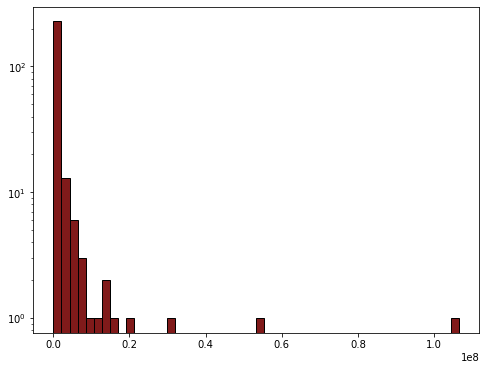

In [22]:
#Get a DataFrame of just the sums:
df_sums = df_grouped.sum()

#Note that Year and Per_Capita are now meaningless

#If we just wanted Total:
#df_sums = df_grouped[['Total']].sum()

display(df_sums.head())

#Plot the Total cumulative emissions histogram:
df_sums['Total'].hist(bins = 50, edgecolor='black', facecolor=(.5, .1, .1), grid=False, log=True, figsize=(8,6));

In [90]:
#How much fossil (+cement) carbon has been emmitted by all countries since 1750??
#In Billion Metric Tons
#Note that the following is a Series object:
df_sums.sum() / 1e6


Year           35.204350
Total         416.344888
Solid         202.353533
Liquid        139.231103
Gas            60.639831
Cement         10.479518
Flaring         3.641018
Per_Capita      0.014581
Bunker         10.772314
dtype: float64

In [24]:
#Get the top cumulative emitters:
#Divide by 1e6 to convert to billion metric tons
######

df_sums.sort_values(by = ['Total'], ascending=False).head(20) / 1e6

#Get number one:
#df_sums.sort_values(by = ['Total'], ascending=False).head(20).index[0]

,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
Nation,,,,,,,,,
UNITED STATES OF AMERICA,0.416053,106.580008,46.225736,40.114766,19.227174,0.712535,0.299800,0.000335,1.675645
CHINA (MAINLAND),0.229201,54.457915,42.327190,7.651261,1.207374,3.263736,0.008355,0.000044,0.191076
USSR,0.268914,30.535488,15.021732,9.801230,5.063003,0.501848,0.147678,0.000000,0.153234
UNITED KINGDOM,0.503028,20.811590,15.436727,3.456718,1.727271,0.135539,0.055331,0.000181,0.493008
JAPAN,0.134878,15.608275,4.978876,8.563018,1.543446,0.522576,0.000364,0.000130,0.558742
GERMANY,0.343803,13.335524,9.799003,2.213018,1.196820,0.119537,0.007143,0.000073,0.210808
INDIA,0.289408,13.215139,8.915519,3.229505,0.477056,0.549068,0.043996,0.000013,0.090048
RUSSIAN FEDERATION,0.052117,11.858257,3.217171,2.653961,5.703969,0.143654,0.139507,0.000082,0.144994
FRANCE (INCLUDING MONACO),0.401614,9.956002,5.074903,3.791904,0.886101,0.189929,0.013162,0.000125,0.310923


C:\Users\Steffen\miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


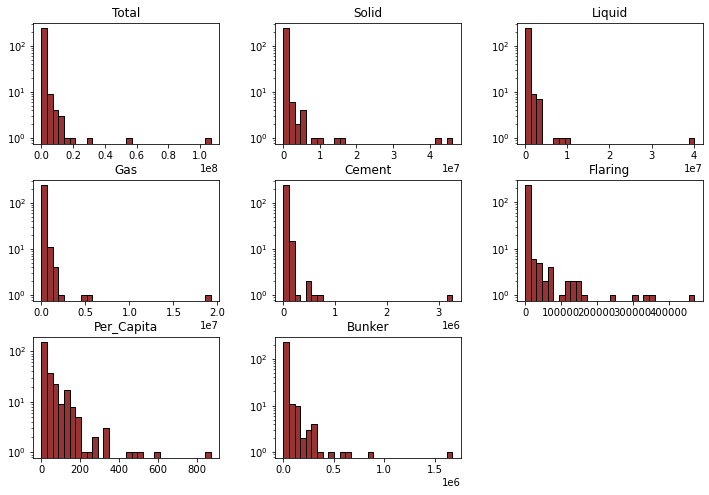

In [26]:
#Can also plot all the variables:
###
#Let's add a bigger figure/axis:
fig1, ax1 = plt.subplots(1, 1, figsize=(12,8))

#Exclude Year:
df_sums.iloc[:,1:9].hist(bins = 30, ax = ax1, edgecolor='black', facecolor=(.6, .2, .2), grid=False, log=True);

In [93]:
#To put Nation name, which is now the index, back to a column:
#####

df_sums.reset_index().head()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
0,AFGHANISTAN,136827,43790,11332.0,24874.0,5249.0,709,1625.0,2.32,320
1,ALBANIA,167875,74103,17926.0,47119.0,4383.0,4679,0.0,27.28,490
2,ALGERIA,211998,1121349,30826.0,391192.0,489710.0,53553,156079.0,41.12,30038
3,ANDORRA,56098,3714,0.0,3714.0,0.0,0,0.0,51.91,0
4,ANGOLA,134878,173706,437.0,84370.0,9985.0,6613,72307.0,10.68,18431


### Now let's get cumulative emissions and plot...

In [27]:
#Get the dataframe again, just to be safe...

df = get_carbon_df()

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Bunker
0,AFGHANISTAN,1949,0.000004,0.000004,0.000000,0.0,0.0,NaN,0.0
1,AFGHANISTAN,1950,0.000027,0.000010,0.000018,0.0,0.0,0.0,0.0
2,AFGHANISTAN,1951,0.000052,0.000017,0.000036,0.0,0.0,0.0,0.0
3,AFGHANISTAN,1952,0.000077,0.000026,0.000053,0.0,0.0,0.0,0.0
4,AFGHANISTAN,1953,0.000106,0.000036,0.000071,0.0,0.0,0.0,0.0


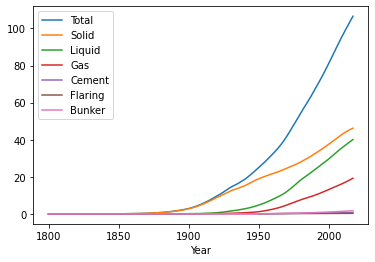

In [28]:
#The following bit of code with groupby Nation will take cumulative sum down the years:
#Could do this:
#df = df.fillna(0)

df_cumulative = df.copy()

#Drop Per_Capita: Doesn't make sense to take cumulative sum
df_cumulative.drop(columns = 'Per_Capita', inplace=True)


convert_cols = ['Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Bunker']

#Note we preserve the Year, doing this
#Note also the division by 1e6
df_cumulative[convert_cols] = df.groupby(by = ['Nation'])[convert_cols].cumsum() / 1e6

display(df_cumulative.head())

#Plot the results for the US:
df_cumulative.loc[df_cumulative['Nation'] == 'UNITED STATES OF AMERICA'].plot(x = 'Year')

In [30]:
#The following is an alternative method to take the cumulative sums (preserving year):
######

#df_cumulative = df.copy()

#Drop Per_Capita: Doesn't make sense to cumulative sum
df_cumulative.drop(columns = 'Per_Capita', inplace=True)

df_cumulative = df.groupby(by = ['Nation', 'Year'])
df_cumulative = df_cumulative.sum().groupby(level=0).cumsum().reset_index()

#####

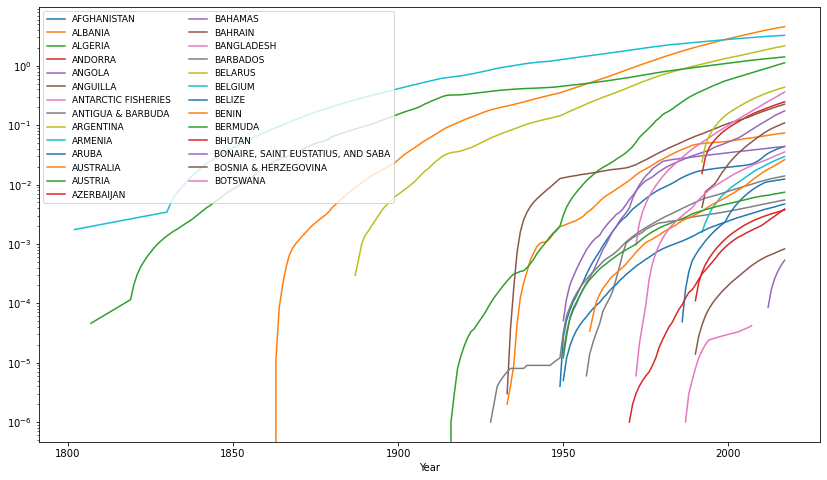

In [98]:
#We could use grouping to plot individual country time-series:
####

fig1, ax1 = plt.subplots(1, 1, figsize=(14,8))

#Sneak in an enumerate:
####
for i, (name, group) in enumerate(df_cumulative.groupby(by = 'Nation')):
    #print(name, '\n')
    #print(group, '\n')
    
    group.plot(x = 'Year', y = 'Total', ax = ax1, legend=False, logy=True, label=name)
    
    if (i > 25):
        break
        
ax1.legend(ncol=2, loc='upper left', fontsize=9)

#### Get Total Cumulative Emissions by Year

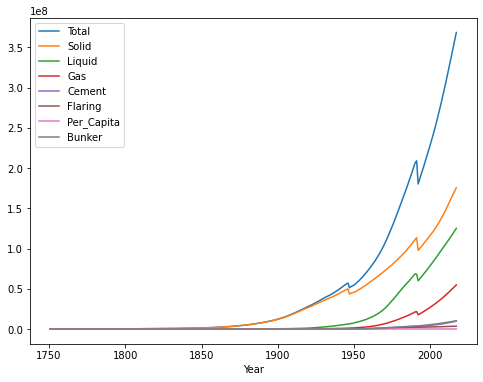

In [40]:
#Let's group by year and sum, to get total global emissions!:
########

df_world = df_cumulative.groupby(by = 'Year').sum()

df_world = df_world.reset_index()

#We have some very odd points where the cumulative sums go down:
df_world.plot(x = 'Year', figsize=(8,6))


In [35]:
#Let's compare the above to the provided global emissions data series...
####

url_name = 'https://zenodo.org/record/4281271/files/global.1751_2017.csv?download=1'

#Let's go ahead and download...
global_file = r'Data/global.1751_2017.csv'

#Download and save
request.urlretrieve(url_name, global_file)


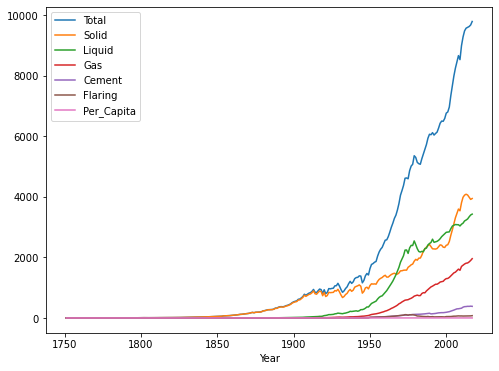

In [36]:
#No Nation or Bunker columns for this dataset:
name_list = ['Year', 'Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Per_Capita']

df_global = pd.read_csv(global_file, header = 4, names = name_list)
df_global.head()

#This is the global yearly emissions series:
df_global.plot(x = 'Year', figsize=(8,6))

In [37]:
#What do we have as our grand totals?
df_global.sum() / 1e3

Year          503.02800
Total         429.21800
Solid         202.29900
Liquid        151.73400
Gas            60.81000
Cement         10.49500
Flaring         3.88600
Per_Capita      0.07274
dtype: float64

In [38]:
#Compare to our previous:
df_sums.sum() / 1e6

Year           35.204350
Total         416.344888
Solid         202.353533
Liquid        139.231103
Gas            60.639831
Cement         10.479518
Flaring         3.641018
Per_Capita      0.014581
Bunker         10.772314
dtype: float64

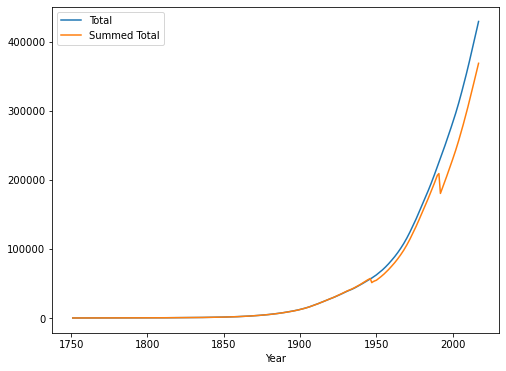

In [44]:
#Let's take the cumulative sums and look at our time-series...
#####
df_global_cum = df_global.copy()

df_global_cum.iloc[:,1:8] = df_global.iloc[:,1:8].cumsum()



#Plot the new data and the old, just the Totals
fig1, ax1 = plt.subplots(1, 1, figsize=(8,6))

df_global_cum[['Total', 'Year']].plot(x = 'Year', ax = ax1)

#Need to divide by 1000: Different unit scalings for the datasets
ax1.plot(df_world.Year, df_world.Total / 1000, label='Summed Total')
ax1.legend()

In [42]:
#And look at our dataframe
df_global_cum

,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita
0,1751,3,3,0,0,0,0,0.00
1,1752,6,6,0,0,0,0,0.00
2,1753,9,9,0,0,0,0,0.00
3,1754,12,12,0,0,0,0,0.00
4,1755,15,15,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...
262,2013,390536,186395,138297,53286,8953,3611,67.54
263,2014,400131,190455,141566,55102,9338,3676,68.86
264,2015,409754,194440,144905,56953,9721,3741,70.17
265,2016,419428,198355,148305,58852,10111,3810,71.45


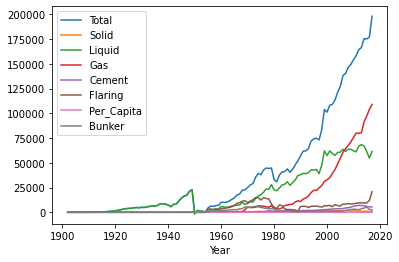

In [51]:
#Turn out, there are negative values in the National series, e.g.:
####

df.loc[df['Nation'] == 'ISLAMIC REPUBLIC OF IRAN'].plot(x = 'Year')


In [52]:
#Let's see all the values < 0:
df.loc[df['Total'] < 0]

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker
657,AUSTRALIA,1851,-17,-17.0,0.0,0.0,0,NaN,NaN,0
658,AUSTRALIA,1852,-15,-15.0,0.0,0.0,0,NaN,NaN,0
659,AUSTRALIA,1853,-30,-30.0,0.0,0.0,0,NaN,NaN,0
660,AUSTRALIA,1854,-35,-35.0,0.0,0.0,0,NaN,NaN,0
661,AUSTRALIA,1855,-36,-36.0,0.0,0.0,0,NaN,NaN,0
662,AUSTRALIA,1856,-50,-50.0,0.0,0.0,0,NaN,NaN,0
663,AUSTRALIA,1857,-57,-57.0,0.0,0.0,0,NaN,NaN,0
664,AUSTRALIA,1858,-67,-67.0,0.0,0.0,0,NaN,NaN,0
665,AUSTRALIA,1859,-103,-103.0,0.0,0.0,0,NaN,NaN,0
7827,IRAQ,1948,-26,0.0,-26.0,0.0,0,NaN,NaN,0


In [53]:
#Let's filter any negative values in the national series to 0
#Unclear why this happened, but oh well let's try...

df = get_carbon_df()

#Iterate through everything but Names and Year:
#Also track total negative values for the Total column
neg_sum = 0

for k in df.columns[2:]:
    if (k == 'Total'):
        neg_sum = neg_sum + df.loc[df[k] < 0, k].sum()
    
    df.loc[df[k] < 0, k] = 0
    
neg_sum

-3901

In [54]:
#Confirm filtering!

df.loc[df['Total'] < 0]

,Nation,Year,Total,Solid,Liquid,Gas,Cement,Flaring,Per_Capita,Bunker


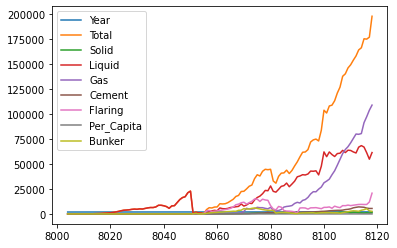

In [55]:
#Now plot again:

df.loc[df['Nation'] == 'ISLAMIC REPUBLIC OF IRAN'].plot()

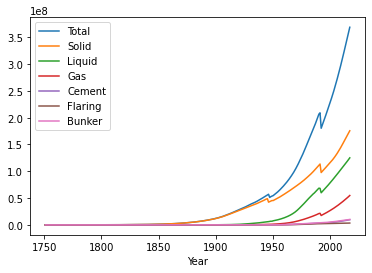

In [56]:
#Now let's repeat the steps above...

#We have our shiny new, filtered df:
df_cumulative = df.copy()


#Drop Per_Capita: Doesn't make sense to cumulative sum
df_cumulative.drop(columns = 'Per_Capita', inplace=True)

convert_cols = ['Total', 'Solid', 'Liquid', 'Gas', 'Cement', 'Flaring', 'Bunker']

df_cumulative[convert_cols] = df.groupby(by = ['Nation'])[convert_cols].cumsum()

#Let's group by year and sum, to get total global emissions!:
########

df_world = df_cumulative.groupby(by = 'Year').sum()


#We *still* have some very odd points where the cumulative sums go down:
df_world.plot()



In [58]:
#First shifts happen around 1947
display(df_world.loc[1947] - df_world.loc[1946])

Total     -5985105.0
Solid       992620.0
Liquid      357863.0
Gas          67169.0
Cement       -7517.0
Flaring          0.0
Bunker           0.0
dtype: float64

Year
1941     76
1942     73
1943     76
1944     74
1945     79
1946     79
1947     82
1948     85
1949     86
1950    149
1951    151
1952    153
1953    153
1954    154
1955    159
1956    160
1957    162
1958    167
1959    174
dtype: int64

Year
1976    186
1977    186
1978    186
1979    186
1980    185
1981    186
1982    186
1983    186
1984    185
1985    185
1986    186
1987    187
1988    187
1989    187
1990    195
1991    195
1992    215
1993    215
1994    216
dtype: int64

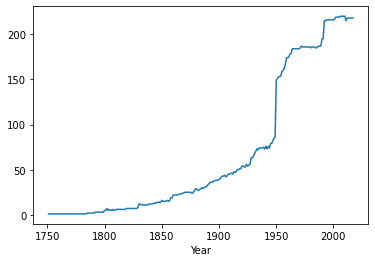

In [46]:
#Let's see how many countries are contributing at each year:

num_countries = df_cumulative.groupby('Year').size()

num_countries.plot()

#How many countries around from 1940 through 1960?
display(num_countries[(num_countries.index < 1960) & (num_countries.index > 1940)])

#How many countries around from 1975 through 1995?
display(num_countries[(num_countries.index > 1975) & (num_countries.index < 1995)])

#Turns out different counties have data for some years, so get the jumps...

In [59]:
#The one that explains dip at 1947: Germany!
####

for k, (name, group) in enumerate(df_cumulative.groupby(by = 'Nation')):
    
    if 1946 in group.Year.values and not (1947 in group.Year.values):
        print(name)

    #What about:
    #And flip these also:
    #if 1992 in group.Year.values and not (1989 in group.Year.values):
    #    print(name)
        

GERMANY


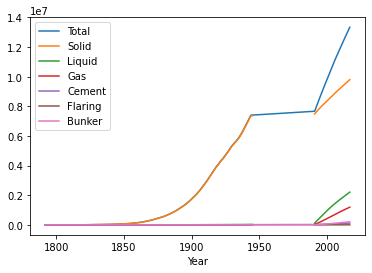

In [61]:
df_cumulative.loc[df_cumulative['Nation'] == 'GERMANY'].plot(x = 'Year')

In [ ]:
#Dip in the early 1990s?
#Clearly related to the breakup of the former Soviet Union and the reshuffling of countries

### Plotting With Pandas


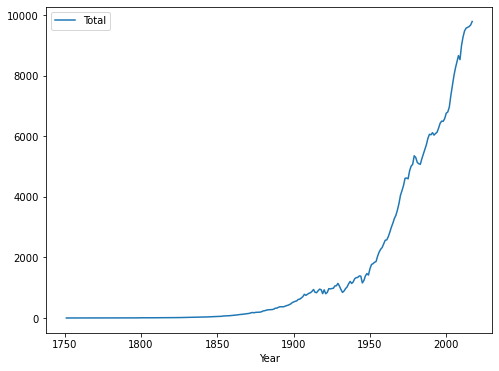

In [63]:
#We've already plotted some times-series
#Let's just use our global times-series here

#We can specify an axis as above:
fig1, ax1 = plt.subplots(1,1, figsize=(8,6))


#Recall plotting one series in the dataframe:
df_global.plot(x = 'Year', y = 'Total', ax=ax1)


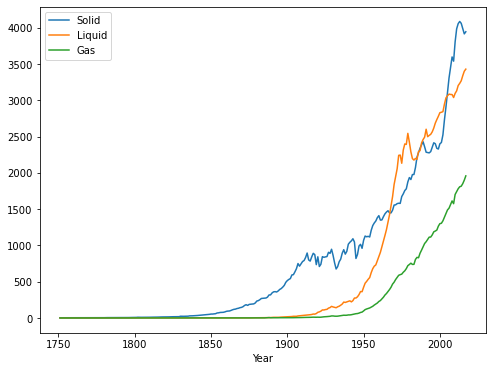

In [65]:
#And plotting several:
fig1, ax1 = plt.subplots(1,1, figsize=(8,6))

#Just several
df_global.plot(x = 'Year', y = ['Solid', 'Liquid', 'Gas'], ax=ax1)

#And all:
#df_global.plot(x = 'Year', ax=ax1)

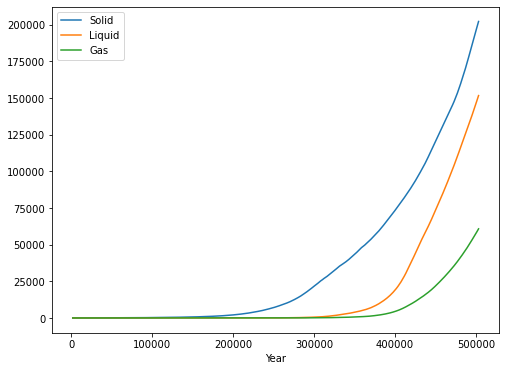

In [66]:
#Can also do cumulative sum like so (note this messes our year up, though)
fig1, ax1 = plt.subplots(1,1, figsize=(8,6))

df_global.cumsum().plot(x = 'Year', y = ['Solid', 'Liquid', 'Gas'], ax=ax1)

Can specify `kind` argument to `plot()` method, with options:

- `bar` or `barh` for bar plots

- `hist` for histogram

- `box` for boxplot

- `kde` or `density` for density plots

- `area` for area plots

- `scatter` for scatter plots

- `hexbin` for hexagonal bin plots

- `pie` for pie plots


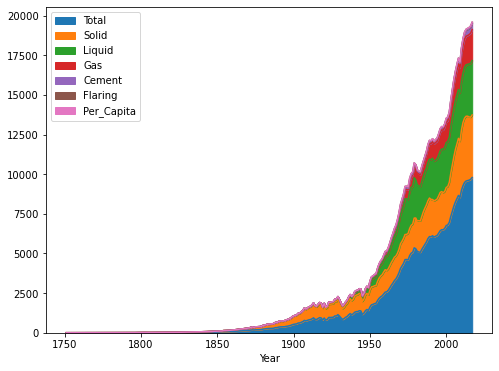

In [67]:
#Let's do an area plot:
#######

fig1, ax1 = plt.subplots(1,1, figsize=(8,6))

df_global.plot(x = 'Year', kind = 'area', ax = ax1)

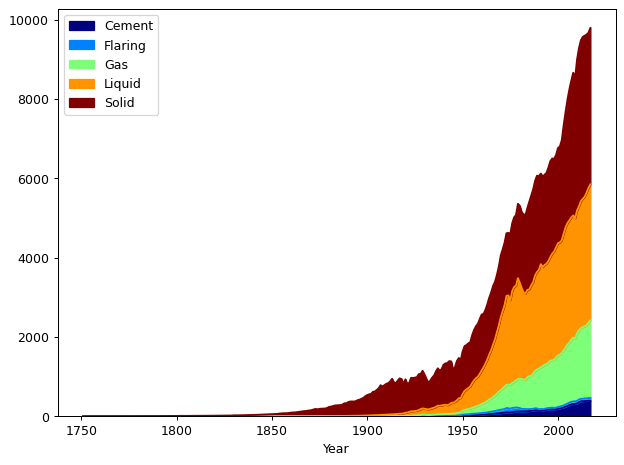

In [112]:
#But we don't really want Total or Per_Capita
#Let's exclude:
df2 = df_global.loc[:, df_global.columns.difference(['Total', 'Per_Capita'])]


fig1, ax1 = plt.subplots(1,1, figsize=(8,6), dpi=90)

#Plot: Can change the colormap to various options:
df2.plot(x = 'Year', kind = 'area', ax = ax1, cmap='jet')

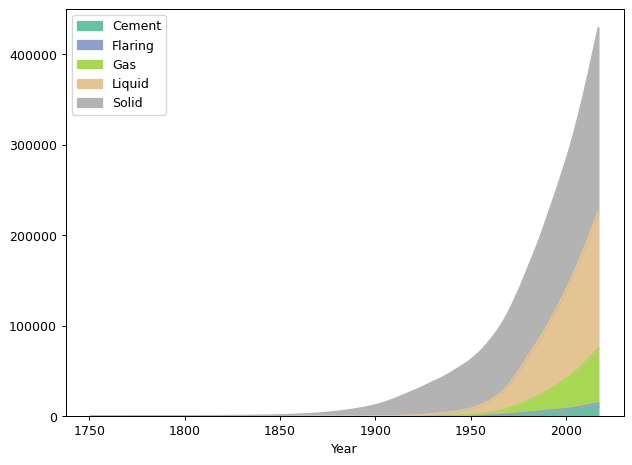

In [113]:
#And cumsum:
fig1, ax1 = plt.subplots(1,1, figsize=(8,6), dpi=90)

#Let's preserve year here:
df2.iloc[:,:-1] = df2.iloc[:,:-1].cumsum()

#And plot:
df2.plot(x = 'Year', kind = 'area', ax = ax1, cmap='Set2')

In [117]:
#Let's find the year after which 50% of all fossil emissions were emitted
#####
#Let's groud df2 by year, since we dropped total, and sum:
#We need to sum by year and across the rows:
#Let's also reset our index while we're at it...
df3 = df2.groupby('Year').sum().sum(axis = 1)

total_emissions = np.max(df3)

for year in df3.index:
    if (df3.loc[year] >= total_emissions / 2):
        print(year)
        break

#Also:
#What fraction of all emissions from 1984 through 2017?
#print((df3.loc[2017] - df3.loc[1925]) / total_emissions)

1990
0.9240350027025516


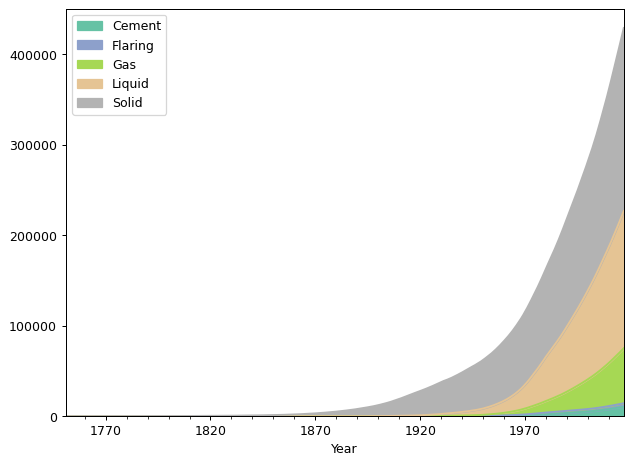

In [109]:
#Finally: Note pd.to_datetime:
#####################

#Also note that we need to convert to a string first:
df2.Year = pd.to_datetime(df2.Year.astype(str))

#And plot:
fig1, ax1 = plt.subplots(1,1,figsize=(8,6), dpi=90)
df2.plot(x = 'Year', kind = 'area', ax = ax1, cmap='Set2')


### Finally, melt + a pie chart...

In [ ]:
df2.iloc[-1:-2:-1]

In [118]:
#Let's get a DataFrame that is just our last year
final_emissions = df2.iloc[-1:-2:-1]

final_emissions

,Cement,Flaring,Gas,Liquid,Solid,Year
266,10495,3886,60810,151734,202299,2017


We'd like to make a pie chart showing the relative contributions of each fossil type, but pie() takes a single column as the `y` argument

Let's `melt`:

In [119]:
df_long = pd.melt(final_emissions, id_vars=['Year'], value_vars=final_emissions.columns[0:5],
        var_name='Category', value_name='Emissions')

df_long

,Year,Category,Emissions
0,2017,Cement,10495
1,2017,Flaring,3886
2,2017,Gas,60810
3,2017,Liquid,151734
4,2017,Solid,202299


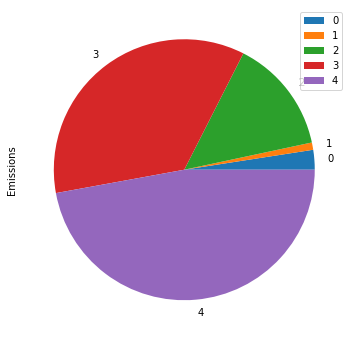

In [120]:
#Plot make our much anticipated pie chart:
df_long.plot.pie(y = 'Emissions', figsize=(6,6))

#Gah! Labels are all wrong

In [121]:
#To fix, let's set our index:
df_long = df_long.set_index('Category')

df_long

,Year,Emissions
Category,,
Cement,2017,10495
Flaring,2017,3886
Gas,2017,60810
Liquid,2017,151734
Solid,2017,202299


Text(0, 0.5, 'Emissions')

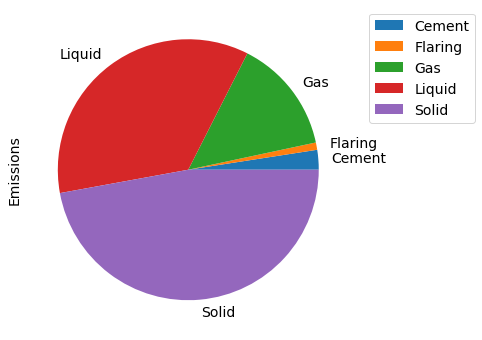

In [122]:
#Plot our even more anticipated pie chart:
fig1, ax1 = plt.subplots(1,1, figsize=(6,6))

df_long.plot.pie(y = 'Emissions', figsize=(6,6), fontsize=14, ax=ax1)

#Try with and without this:
ax1.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.4, 1))
ax1.set_ylabel('Emissions', fontsize=14)


### Some simpler plotting demos from here out...

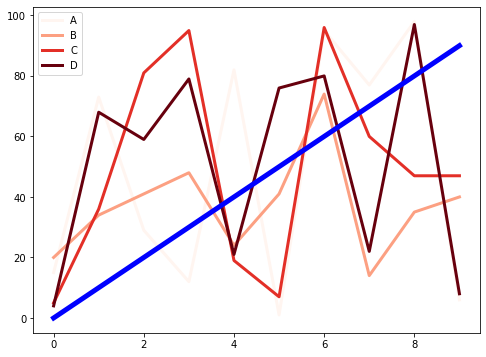

In [123]:
#Just make some random stuff:
df = pd.DataFrame(np.random.rand(10, 4).round(2)*100, columns=list("ABCD"))

#Note that we can mix in other matplotlib plotting on the same axis:
####

fig1, ax1 = plt.subplots(1,1, figsize=(8,6))
df.plot(ax = ax1, linewidth=3, cmap='Reds')

#Add some matplotlib
x = np.arange(0,10)
y = x*10
ax1.plot(x, y, linewidth=5, color='blue')

In [124]:
df

,A,B,C,D
0,15.0,20.0,5.0,4.0
1,73.0,34.0,36.0,68.0
2,29.0,41.0,81.0,59.0
3,12.0,48.0,95.0,79.0
4,82.0,24.0,19.0,21.0
5,1.0,41.0,7.0,76.0
6,95.0,74.0,96.0,80.0
7,77.0,14.0,60.0,22.0
8,98.0,35.0,47.0,97.0
9,6.0,40.0,47.0,8.0


#### Can also plot using method pd.plot.\<kind\>

In [ ]:
#Can try:
#df.plot.<TAB>
df.plot.

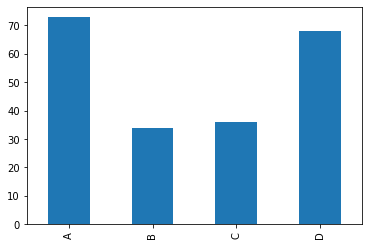

In [125]:
#Do a simple bar plot:
df.iloc[1].plot.bar()

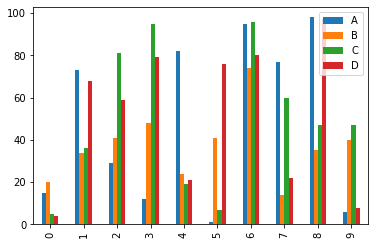

In [126]:
#Do a slightly less simple:
df.plot.bar()

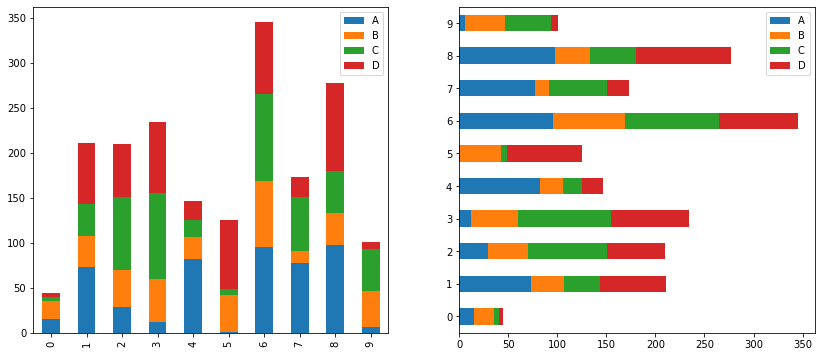

In [127]:
#To stack, or do horizontal:
fig1, ax1 = plt.subplots(1,2, figsize=(14,6))

df.plot.bar(ax = ax1[0], stacked=True)
df.plot.barh(ax = ax1[1], stacked=True)

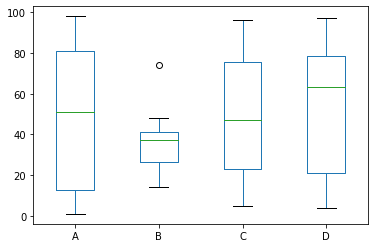

In [128]:
#Can make a boxplot:
df.plot.box()

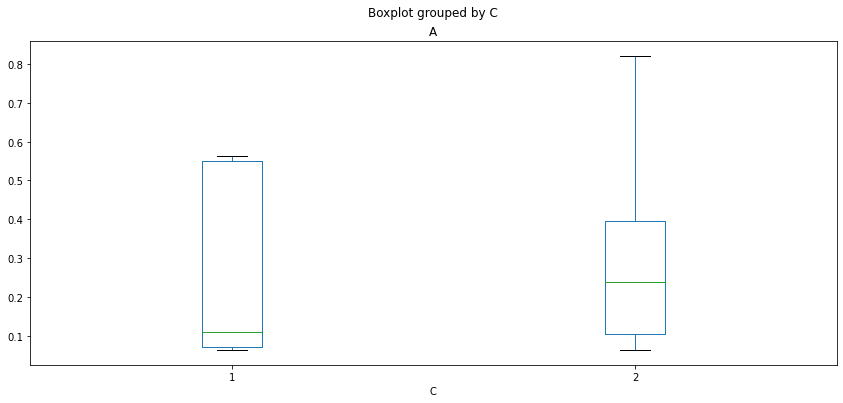

In [130]:
#Or:
#We can also plot one column or more column, grouped by another:

#Remake df with more points:
df = pd.DataFrame(np.random.rand(10, 4), columns=list("ABCD"))

#Set column C = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2], but more compactly:
df["C"] = np.array([1]*5 + [2]*5)

fig1, ax1 = plt.subplots(1,1, figsize=(14,6))

df.boxplot(column = ["A"], by = "C", ax = ax1, grid=False)

#ax1.grid(False)
#fig1.suptitle('Replace the Default');
#ax1.set_title('Replace this default too')

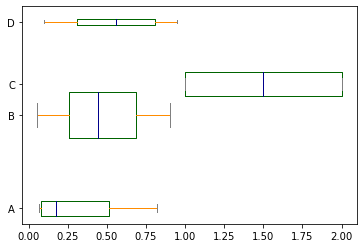

In [131]:
#Can do custom colors, positions, and widths, etc:
####

my_colors = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

my_positions = [1, 4, 5, 7]
my_widths = [.5, 1.5, .75, .2]

df.plot.box(color = my_colors, sym='*', vert=False,
             positions=my_positions,
             widths=my_widths)

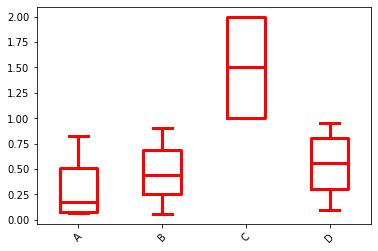

In [132]:
#And can do custom box, whisker, cap, flier, and median props:
boxprops = dict(linewidth = 3, color = 'black')

whiskerprops = dict(linestyle = '-', linewidth=3, color='red')
boxprops = dict(linewidth = 3, color = 'red')
capprops = dict(linewidth = 3, color = 'red')
flierprops = dict(markersize=10, markeredgewidth=2, markeredgecolor='red', markerfacecolor='red')
medianprops = dict(linewidth = 3, color = 'red')

df.boxplot(boxprops = boxprops,
            whiskerprops = whiskerprops,
            capprops = capprops,
            flierprops = flierprops,
            medianprops = medianprops,
            rot = 45, grid=False)


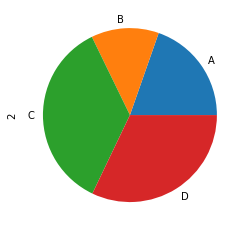

In [133]:
#Make a pie plot from a Series: y value unambiguous here (vs DataFrame)
###

df.iloc[2].plot.pie();

,A,B,C
0,-2.692654,0.114182,0.693107
1,-1.406701,-1.748051,2.215709
2,-1.060916,-0.391031,0.726178
3,-1.017921,0.793292,2.237999
4,0.310165,-0.458434,1.144124
...,...,...,...
995,-2.629119,-1.326020,-0.481906
996,-1.316131,-1.961741,-0.002145
997,-0.299456,0.284457,1.095748
998,-1.930168,-1.213170,1.315240


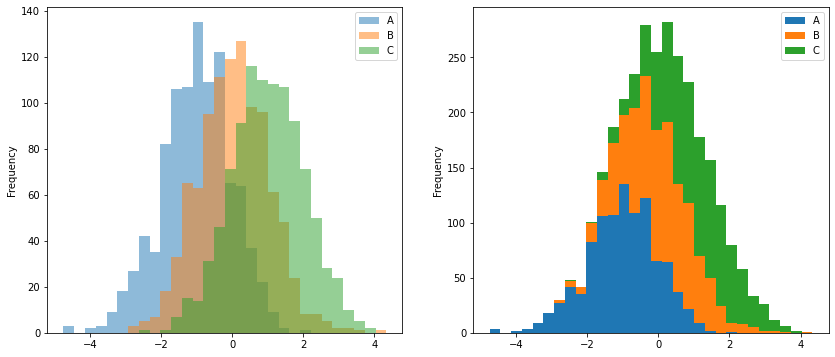

In [136]:
#Histograms, again:
####

df3 = pd.DataFrame({"A":np.random.randn(1000) - 1, "B":np.random.randn(1000), "C":np.random.randn(1000) + 1})

display(df3)

fig1, ax1 = plt.subplots(1,2, figsize=(14,6))

df3.plot.hist(alpha=0.5, bins=30, ax=ax1[0])
df3.plot.hist(stacked=True, bins=30, ax=ax1[1]) #orientation="horizontal"

C:\Users\Steffen\miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


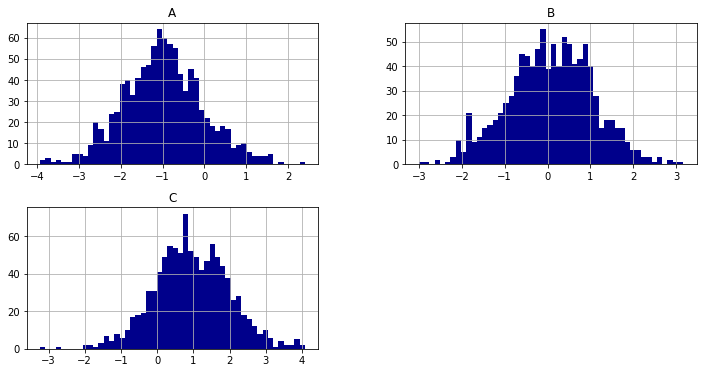

In [135]:
#Can plot on multiple subplots like so:
fig1, ax1 = plt.subplots(1,1, figsize=(12,6))

df3.hist(color="darkblue", bins=50, ax=ax1);

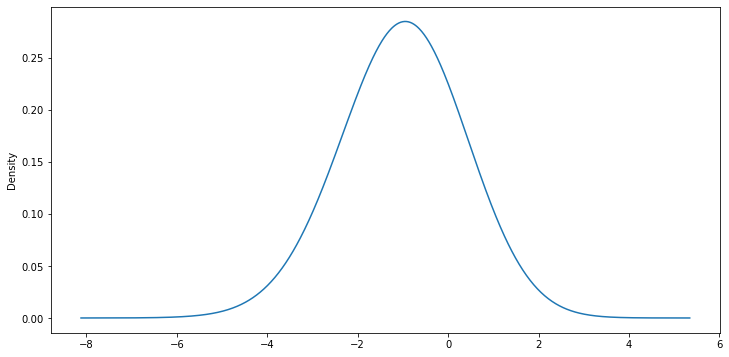

In [137]:
#Also can do a kernel density estimate:
#####
fig1, ax1 = plt.subplots(1,1, figsize=(12,6))

df3['A'].plot.kde(bw_method=1)


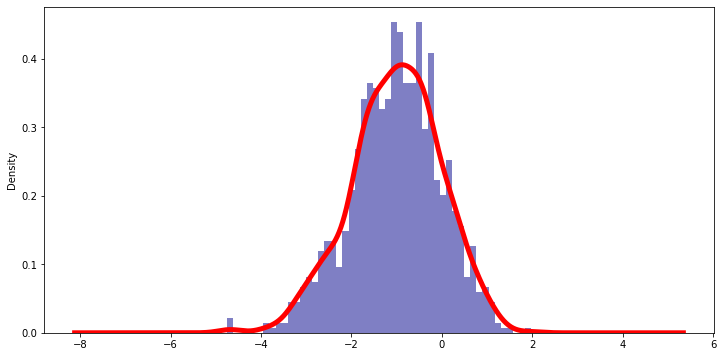

In [138]:
#Plot both histogram and kde together...
fig1, ax1 = plt.subplots(1,1, figsize=(12,6))

df3['A'].hist(color="darkblue", bins=50, ax=ax1, alpha=.5, density=True)

x = df3['A'].plot.kde(ax=ax1, linewidth=5, color='red')

numpy.ndarray

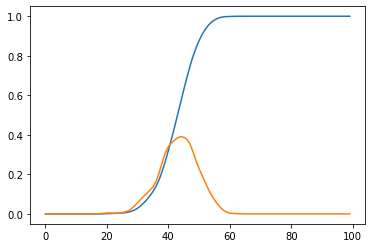

In [139]:
#Want to integrate the kernel?
#############

import scipy

#Estimate the kernel
kernel = scipy.stats.gaussian_kde(df3['A'])

#Get the kernel at certain points:
y = kernel(np.linspace(-8,8,100))

display(type(y))

plt.plot(y.cumsum() / y.sum())
plt.plot(y)

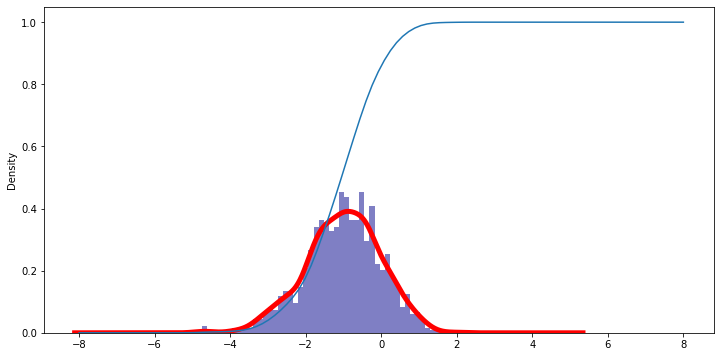

In [140]:
#All together:

fig1, ax1 = plt.subplots(1,1, figsize=(12,6))

h = df3['A'].hist(color="darkblue", bins=50, ax=ax1, alpha=.5, density=True)

x = df3['A'].plot.kde(ax=ax1, linewidth=5, color='red')

#Estimate the kernel
kernel = scipy.stats.gaussian_kde(df3['A'])

#Get the kernel at certain points:
x_points = np.linspace(-8,8,100)
y = kernel(x_points)

ax1.plot(x_points, y.cumsum() / y.sum())

Finally, the hexbin:

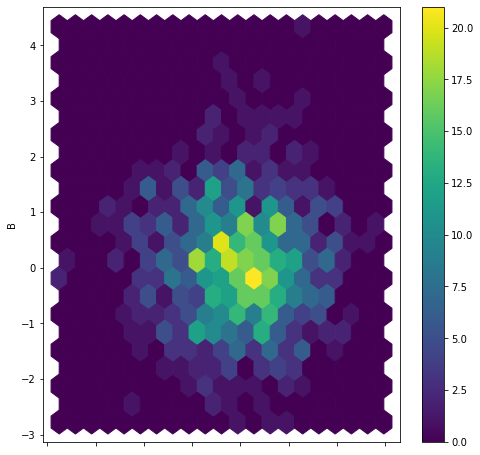

In [141]:
###Make a hexbin!

df3.plot.hexbin(x = 'A', y='B', gridsize=20, cmap='viridis', figsize=(8,8))


As always, there's a lot more you can do with Pandas, grouping, plotting, and so on...